20191015  
### 「データ解析実践道場」3-5発現定量解析

VS CODEにcondaで使った仮想環境を対応させる  
参考：https://qiita.com/kusanoiskuzuno/items/dabed9c2f538bc6744cf  
https://qiita.com/syo_nasu/items/ccc5e5cebe5b5d84a99b

% conda create -n drbonodojo anaconda  


## リファレンスありの発現定量

### query配列の取得とその処理

In [1]:
!pwd

/Users/yamada/bioinformatics/drbonodojo/datadojo/3-5-gene


In [16]:
%cd ./sequence/

/Users/yamada/bioinformatics/drbonodojo/datadojo/3-5-gene/sequence


In [3]:
!curl -O ftp://ftp.ddbj.nig.ac.jp/ddbj_database/dra/sra/ByExp/sra/DRX/DRX094/DRX094089/DRR100656/DRR100656.sra
!curl -O ftp://ftp.ddbj.nig.ac.jp/ddbj_database/dra/sra/ByExp/sra/DRX/DRX094/DRX094090/DRR100657/DRR100657.sra

% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1836M  100 1836M    0     0  1576k      0  0:19:53  0:19:53 --:--:--     0
curl: (28) FTP response timeout
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1781M  100 1781M    0     0  2256k      0  0:13:28  0:13:28 --:--:--     0
curl: (28) FTP response timeout


In [17]:
!ls -l

total 7439568
-rw-r--r--  1 yamada  staff  1926034982 10 15 01:48 DRR100656.sra
-rw-r--r--  1 yamada  staff  1867741221 10 15 02:02 DRR100657.sra


In [7]:
!conda install -c bioconda sra-tools -y

done

# All requested packages already installed.



In [18]:
!time fasterq-dump DRR100656.sra

spots read      : 23,193,193
reads read      : 46,386,386
reads written   : 46,386,386

real	1m32.549s
user	1m36.689s
sys	1m35.337s


In [19]:
!time fasterq-dump DRR100657.sra

spots read      : 22,695,733
reads read      : 45,391,466
reads written   : 45,391,466

real	1m16.936s
user	1m39.186s
sys	1m12.872s


In [20]:
#内容の確認
!ls -l

total 72360624
-rw-r--r--  1 yamada  staff  1926034982 10 15 01:48 DRR100656.sra
-rw-r--r--  1 yamada  staff  8396394240 10 15 02:21 DRR100656.sra_1.fastq
-rw-r--r--  1 yamada  staff  8396394240 10 15 02:21 DRR100656.sra_2.fastq
-rw-r--r--  1 yamada  staff  1867741221 10 15 02:02 DRR100657.sra
-rw-r--r--  1 yamada  staff  8215871450 10 15 02:22 DRR100657.sra_1.fastq
-rw-r--r--  1 yamada  staff  8215871450 10 15 02:22 DRR100657.sra_2.fastq


並列版でgzip可能なpzipをinstall

In [22]:
!conda install -c anaconda pigz -y

done

## Package Plan ##

  environment location: /Users/yamada/anaconda3/envs/drbonodojo

  added / updated specs:
    - pigz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.8.28  |                0         133 KB  anaconda
    certifi-2019.9.11          |           py37_0         154 KB  anaconda
    pigz-2.4                   |       ha441bb4_0          73 KB  anaconda
    ------------------------------------------------------------
                                           Total:         360 KB

The following NEW packages will be INSTALLED:

  pigz               anaconda/osx-64::pigz-2.4-ha441bb4_0

The following packages will be UPDATED:

  openssl              pkgs/main::openssl-1.1.1d-h1de35cc_2 --> anaconda::openssl-1.1.1-h1de35cc_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 p

In [23]:
#fastqの圧縮
!time pigz *.fastq


real	5m46.353s
user	49m0.526s
sys	1m6.177s


In [24]:
!ls -l

total 19779704
-rw-r--r--  1 yamada  staff  1926034982 10 15 01:48 DRR100656.sra
-rw-r--r--  1 yamada  staff  1585556555 10 15 02:21 DRR100656.sra_1.fastq.gz
-rw-r--r--  1 yamada  staff  1602432563 10 15 02:21 DRR100656.sra_2.fastq.gz
-rw-r--r--  1 yamada  staff  1867741221 10 15 02:02 DRR100657.sra
-rw-r--r--  1 yamada  staff  1533053895 10 15 02:22 DRR100657.sra_1.fastq.gz
-rw-r--r--  1 yamada  staff  1565040147 10 15 02:22 DRR100657.sra_2.fastq.gz


### トランスクリプトーム配列の取得とそのindexの作成

In [25]:
%cd ../reference/

/Users/yamada/bioinformatics/drbonodojo/datadojo/3-5-gene/reference


In [26]:
#ヒトのcDNA配列セットをGENCODEから取得
#Release 32 (GRCh38.p13)
!curl -O ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_32/gencode.v32.transcripts.fa.gz

% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 69.2M  100 69.2M    0     0  1786k      0  0:00:39  0:00:39 --:--:-- 1162k


In [28]:
#salmonのinstall
!conda install -c bioconda salmon -y

-
  - anaconda::ca-certificates-2019.8.28-0, anaconda::certifi-2019.9.11-py37_0
  - anaconda::ca-certificates-2019.8.28-0, defaults::certifi-2019.9.11-py37_0
  - anaconda::certifi-2019.9.11-py37_0, defaults::ca-certificates-2019.8.28-0
  - defaults::ca-certificates-2019.8.28-0, defaults::certifi-2019.9.11-py37done

## Package Plan ##

  environment location: /Users/yamada/anaconda3/envs/drbonodojo

  added / updated specs:
    - salmon


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    salmon-0.14.2              |       ha956f45_0        13.5 MB  bioconda
    ------------------------------------------------------------
                                           Total:        13.5 MB

The following NEW packages will be INSTALLED:

  salmon             bioconda/osx-64::salmon-0.14.2-ha956f45_0



salmon-0.14.2        | 13.5 MB   | ##################################### | 100% 
Preparing tran

salmonのindexの作成

In [29]:
!time salmon index -p 4 -t gencode.v32.transcripts.fa.gz -i human --type quasi -k 31 --gencode

Version Info: This is the most recent version of salmon.
index ["human"] did not previously exist  . . . creating it
[2019-10-15 02:32:38.500] [jLog] [info] building index
[2019-10-15 02:32:38.501] [jointLog] [info] [Step 1 of 4] : counting k-mers
[2019-10-15 02:32:40.475] [jointLog] [warning] Entry with header [ENST00000473810.1|ENSG00000239255.1|OTTHUMG00000157482.1|OTTHUMT00000348942.1|AC007620.1-201|AC007620.1|25|processed_pseudogene|], had length less than the k-mer length of 31 (perhaps after poly-A clipping)
[2019-10-15 02:32:40.617] [jointLog] [warning] Entry with header [ENST00000603775.1|ENSG00000271544.1|OTTHUMG00000184300.1|OTTHUMT00000468575.1|AC006499.8-201|AC006499.8|23|processed_pseudogene|], had length less than the k-mer length of 31 (perhaps after poly-A clipping)
[2019-10-15 02:32:42.198] [jointLog] [warning] Entry with header [ENST00000632684.1|ENSG00000282431.1|OTTHUMG00000190602.2|OTTHUMT00000485301.2|TRBD1-202|TRBD1|12|TR_D_gene|], had length less than the k-mer

### salmonによる発現定量

In [33]:
!pwd

/Users/yamada/bioinformatics/drbonodojo/datadojo/3-5-gene/reference


In [36]:
#DRR100656に対して発現定量
!time salmon quant -l A -i human -1 ../sequence/DRR100656.sra_1.fastq.gz  -2 ../sequence/DRR100656.sra_2.fastq.gz --validateMappings -p 4 -o ../quant/DRR100656

Version Info: This is the most recent version of salmon.
### salmon (mapping-based) v0.14.1
### [ program ] => salmon 
### [ command ] => quant 
### [ libType ] => { A }
### [ index ] => { human }
### [ mates1 ] => { ../sequence/DRR100656.sra_1.fastq.gz }
### [ mates2 ] => { ../sequence/DRR100656.sra_2.fastq.gz }
### [ validateMappings ] => { }
### [ threads ] => { 4 }
### [ output ] => { ../quant/DRR100656 }
Logs will be written to ../quant/DRR100656/logs
[2019-10-15 02:39:26.724] [jointLog] [info] Fragment incompatibility prior below threshold.  Incompatible fragments will be ignored.
[2019-10-15 02:39:26.724] [jointLog] [info] Usage of --validateMappings implies use of minScoreFraction. Since not explicitly specified, it is being set to 0.65
[2019-10-15 02:39:26.724] [jointLog] [info] Usage of --validateMappings, without --hardFilter implies use of range factorization. rangeFactorizationBins is being set to 4
[2019-10-15 02:39:26.724] [jointLog] [info] Usage of --validateMappings im

In [37]:
#DRR100656に対して発現定量
!time salmon quant -l A -i human -1 ../sequence/DRR100657.sra_1.fastq.gz  -2 ../sequence/DRR100657.sra_2.fastq.gz --validateMappings -p 4 -o ../quant/DRR100657

Version Info: This is the most recent version of salmon.
### salmon (mapping-based) v0.14.1
### [ program ] => salmon 
### [ command ] => quant 
### [ libType ] => { A }
### [ index ] => { human }
### [ mates1 ] => { ../sequence/DRR100657.sra_1.fastq.gz }
### [ mates2 ] => { ../sequence/DRR100657.sra_2.fastq.gz }
### [ validateMappings ] => { }
### [ threads ] => { 4 }
### [ output ] => { ../quant/DRR100657 }
Logs will be written to ../quant/DRR100657/logs
[2019-10-15 02:42:23.550] [jointLog] [info] Fragment incompatibility prior below threshold.  Incompatible fragments will be ignored.
[2019-10-15 02:42:23.550] [jointLog] [info] Usage of --validateMappings implies use of minScoreFraction. Since not explicitly specified, it is being set to 0.65
[2019-10-15 02:42:23.550] [jointLog] [info] Usage of --validateMappings, without --hardFilter implies use of range factorization. rangeFactorizationBins is being set to 4
[2019-10-15 02:42:23.550] [jointLog] [info] Usage of --validateMappings im

In [38]:
#出力ファイルの確認
!less ../quant/DRR100656/quant.sf

Name    Length  EffectiveLength TPM     NumReads
ENST00000456328.2       1657    1483.229        0.000000        0.000
ENST00000450305.2       632     458.320 0.000000        0.000
ENST00000488147.1       1351    1177.229        14.260273       267.772
ENST00000619216.1       68      1.779   0.000000        0.000
ENST00000473358.1       712     538.294 0.221648        1.903
ENST00000469289.1       535     361.477 0.000000        0.000
ENST00000607096.1       138     18.764  0.000000        0.000
ENST00000417324.1       1187    1013.229        0.000000        0.000
ENST00000461467.1       590     416.353 0.000000        0.000
ENST00000606857.1       840     666.283 0.000000        0.000
ENST00000642116.1       1414    1240.229        0.000000        0.000
ENST00000492842.2       939     765.262 0.000000        0.000
ENST00000641515.2       2618    2444.229        0.000000        0.000
ENST00000335137.4       1054    880.229 0.000000        0.000
ENST00000466430.5       2748    2574.229 

### Bioconductorのパッケージを使って遺伝子ごとの発現値へ変換

In [39]:
!pwd

/Users/yamada/bioinformatics/drbonodojo/datadojo/3-5-gene/reference


In [40]:
#メタデータをGENCODEよりダウンロード
!curl -O ftp://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_32/gencode.v32.metadata.HGNC.gz

% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1411k  100 1411k    0     0   144k      0  0:00:09  0:00:09 --:--:--  313k


In [41]:
%cd ../quant

/Users/yamada/bioinformatics/drbonodojo/datadojo/3-5-gene/quant


In [43]:
!ls

DRR100656 DRR100657 list.csv


In [44]:
!less list.csv

name,SRR,Layout
RCC4-EV,DRR100656,PE
RCC4-VHL,DRR100657,PE
(END)

In [45]:
#install
!Rscript ../installl.R

要求されたパッケージ BiocManager をロード中です 
Bioconductor version 3.9 (BiocManager 1.30.4), R 3.6.0 (2019-04-26)
Update old packages: 'backports', 'BiocManager', 'biomaRt', 'callr', 'curl',
  'data.table', 'devtools', 'digest', 'ellipsis', 'ensembldb', 'gargle',
  'htmlTable', 'htmltools', 'htmlwidgets', 'IRanges', 'later', 'lintr', 'mgcv',
  'pingr', 'pkgbuild', 'pkgconfig', 'promises', 'RcppArmadillo', 'regioneR',
  'rhdf5', 'Rhdf5lib', 'Rhtslib', 'rmarkdown', 'Rsamtools', 'shiny',
  'stringdist', 'xfun'
Bioconductor version 3.9 (BiocManager 1.30.4), R 3.6.0 (2019-04-26)
Installing package(s) 'tximport'
 URL 'https://bioconductor.org/packages/3.9/bioc/bin/macosx/el-capitan/contrib/3.6/tximport_1.12.3.tgz' を試しています 
Content type 'application/x-gzip' length 264981 bytes (258 KB)
downloaded 258 KB


The downloaded binary packages are in
	/var/folders/8g/l6tj9lds0z3b15_dc_wgvy9w0000gn/T//Rtmpx32bKd/downloaded_packages
Update old packages: 'backports', 'BiocManager', 'biomaRt', 'callr', 'curl',
  'data

In [46]:
#tximport実行
!Rscript ../tximport_Rm.R ../reference/gencode.v32.metadata.HGNC.gz list.csv quant.tsv

Parsed with column specification:
cols(
  TXNAME = col_character(),
  GENEID = col_character()
)
 警告:  211406 parsing failures.
row col  expected    actual                                        file
  1  -- 2 columns 3 columns '../reference/gencode.v32.metadata.HGNC.gz'
  2  -- 2 columns 3 columns '../reference/gencode.v32.metadata.HGNC.gz'
  3  -- 2 columns 3 columns '../reference/gencode.v32.metadata.HGNC.gz'
  4  -- 2 columns 3 columns '../reference/gencode.v32.metadata.HGNC.gz'
  5  -- 2 columns 3 columns '../reference/gencode.v32.metadata.HGNC.gz'
... ... ......... ......... ...........................................
See problems(...) for more details.

reading in files with read_tsv
12
transcripts missing from tx2gene: 34020
summarizing abundance
summarizing counts
summarizing length


In [47]:
!less quant.tsv

RCC4-EV RCC4-VHL
A1BG    3.92445155170309        0.697106363218438
A1BG-AS1        0       0
A1CF    0       0
A2M     0       0
A2M-AS1 0.601678863865482       0
A2ML1   0       0
A2ML1-AS1       8.70108134746648        0
A2ML1-AS2       0       0
A2MP1   0       0
A3GALT2 1.42989764505554        7.21262476602968
A4GALT  102.091561825276        117.804609985991
A4GNT   0       0
AAAS    765.12055758634 546.694487791535
AACS    278.445565977444        188.751715325803
AACSP1  1.37560631568988        4.56879294806594
AADAC   0       0
AADACL2 0       0
AADACL2-AS1     0       0
AADACL3 0       0
AADACL4 0       0
AADACP1 0       0
AADAT   340.408358964415        180.039620070636
AAGAB   357.485935823633        730.866280251941
:

### 発現差解析

In [48]:
#sortコマンドで、発現が高いものから順に並び替える
!sort -k2 -rn quant.tsv | less -x 20

7=MT-ATP8             1154707.2642324     1238937.87540313
MT-CO2              822065.473720668    699460.579340996
MT-ATP6             581922.650570746    623492.825639095
MT-ND4L             497137.948251018    509287.447864993
MT-ND4              415765.86720533     393920.765178155
MT-CO3              375430.483813065    464936.061634703
MT-CO1              334904.474808606    385752.817508345
TMSB10              330981.937069843    161547.00798141
MT-ND3              243238.613474186    202617.651407019
EEF1A1              213295.080132293    174340.256390233
MT-ND2              174127.097686394    170209.671900432
MT-RNR2             164731.009265945    132193.481287964
MT-CYB              161411.512361582    168821.618878088
GAPDH               135805.896736601    88068.2737881549
ACTB                115557.834988224    122077.213821809
RPL41               90687.7547876985    97086.2916875528
LDHA                86783.1924567909    21968.8774296433
MTATP6P1            86261.96

In [49]:
#一律に発現量に1を足してから、発現比を計算し、高いものから順に並べる。
!awk '{ print $1"\t"($2+1)/($3+1)}' quant.tsv | sort -k2 -rn > DEG.txt

In [50]:
!less DEG.txt

MT-TC   3643.94
RNU6-33P        2411.77
CA9     1690.64
MIR6858 908.446
MIR6855 908.446
MIR6784 908.446
SNORD19C        760.531
MIR3132 745.663
SNORD60 719.024
MT-TP   683.471
MIR6804 683.471
KRT81   662.981
NDUFA4L2        534.95
MIR6505 470.088
SMIM11B 431.906
MIR941-1        419.721
MIR6832 419.721
MIR4730 380.765
SNORD6  373.835
MIR3197 373.835
MIR590  371.521
SRP9P1  366.882
MIR3192 366.079
CALHM6  343.18
:

In [109]:
%cd ../quant

/Users/yamada/bioinformatics/drbonodojo/datadojo/3-5-gene/quant


In [110]:
#DEGのリストからエンリッチメント解析を行う。
#第1カラムのIDだけ抽出
!cut -f 1 DEG.txt | head -20

MT-TC
RNU6-33P
CA9
MIR6858
MIR6855
MIR6784
SNORD19C
MIR3132
SNORD60
MT-TP
MIR6804
KRT81
NDUFA4L2
MIR6505
SMIM11B
MIR941-1
MIR6832
MIR4730
SNORD6
MIR3197


In [111]:
!cut -f 1 DEG.txt | head -20 > gene.txt

In [52]:
#metascapeをやってみる

### 多数のサンプルを一気に処理する

In [54]:
%cd ../multi_sample/

/Users/yamada/bioinformatics/drbonodojo/datadojo/3-5-gene/multi_sample


In [57]:
#DBCLS SRAのAPIを叩いて、結果を保存
!curl "http://unagi-inu-api.bmu.jp/api/details?db=sra&id=DRP003401" > DRP003401.json

% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10536  100 10536    0     0  85658      0 --:--:-- --:--:-- --:--:-- 86360


DRR.pyを使う

In [58]:
!less DRR.py

#!/usr/bin/env python
import json
print('#!/bin/sh')
f = open('DRP003401.json', 'r')
json_dict = json.load(f)
for i in range(15):
        print('curl -O {}'.format(json_dict['EXPERIMENT_RUN'][i]['RUN']['sra_path']))
(END)

In [63]:
#JSONファイルをパース、結果をファイルに保存
!python DRR.py > DRR-GET.sh
#SRAファイルをバッチ取得
!sh DRR-GET.sh

% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2994M  100 2994M    0     0  2523k      0  0:20:14  0:20:14 --:--:--     0
curl: (28) FTP response timeout
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3035M  100 3035M    0     0  2857k      0  0:18:07  0:18:07 --:--:--     0
curl: (28) FTP response timeout
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1703M  100 1703M    0     0  2489k      0  0:11:40  0:11:40 --:--:--     0
curl: (28) FTP response timeout
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1600M  100 1600M    0     0  1937

In [61]:
#SRAからfastqへの変換
!for f in *.sra; do echo $f && time fasterq-dump $f ; done
#圧縮
!time pigz *.fastq

DRR068893.sra
2019-10-15T01:07:42 fasterq-dump.2.10.0 err: file invalid while opening directory within file system module - failed to resolve column 'QUALITY' idx '2'
2019-10-15T01:07:42 fasterq-dump.2.10.0 err: cmn_iter.c cmn_iter_range().VCursorOpen() -> RC(rcFS,rcDirectory,rcOpening,rcFile,rcInvalid)

real	0m0.795s
user	0m0.100s
sys	0m0.059s
pigz: skipping: *.fastq does not exist

real	0m0.016s
user	0m0.001s
sys	0m0.002s


カイコのトランスクリプトーム配列を取得

In [ ]:
!curl -O http://silkbase.ab.a.u-tokyo.ac.jp/pub/Bomo_gene_models_nucl.fa.gz

In [ ]:
#index作成
!time salmon index -p 4 -t Bomo_gene_models_nucl.fa.gz -i silkworm

In [66]:
!less run-salmon.sh

#!/bin/bash
p=4
for drr in *.sra; do
 echo ${drr%.*}
 time salmon quant -l A -i silkworm -1 ${drr%.*}.sra_1.fastq.gz -2 ${drr%.*}.sra_2.fastq.gz --validateMappings -p $p -o output/${drr%.*}
done
(END)

In [ ]:
#salmonにて定量
!time sh run-salmons.sh

In [68]:
#空のsraファイルを作成
!touch DRR068893.sra
!touch DRR068894.sra
!touch DRR068895.sra
!touch DRR095105.sra
!touch DRR095106.sra
!touch DRR095107.sra
!touch DRR095108.sra
!touch DRR095109.sra
!touch DRR095110.sra
!touch DRR095111.sra
!touch DRR095112.sra
!touch DRR095113.sra
!touch DRR095114.sra
!touch DRR095115.sra
!touch DRR095116.sra

In [70]:
#salmonの出力
!for drr in *.sra; do cut -f4 output/${drr%.*}/quant.sf > output/${drr%.*}/quant.tpm ; done
#一番左のカラムはIDなので、それを抽出
!cut -f 1 output/DRR068893/quant.sf > output/lefter.txt
#ファイル群を横方向に連結
!paste output/lefter.txt output/*/quant.tpm > output/kaiko_5tissues.txt

In [71]:
#結果を見る
!less output/kaiko_5tissues.txt

Name    TPM     TPM     TPM     TPM     TPM     TPM     TPM     TPM     TPM     TPM     TPM     TPM     TPM     TPM     TPM
KWMTBOMO00001   2.410625        2.280158        2.692023        0.033361        0.045129        0.022411        0.174280        0.263233        0.305942        0.441906        0.540911        0.508800        0.000000        0.000000        0.000000
KWMTBOMO00002   0.000000        0.000000        0.000000        0.000000        0.000000        0.000000        0.000000        0.000000        0.000000        0.000000        0.108400        0.000000        0.000000        0.000000        0.000000
KWMTBOMO00003   4.555213        5.401179        4.122819        0.038119        0.025780        0.000000        1.731123        2.000225        1.624796        0.043360        0.029777        0.059184        0.097449        0.064761        0.000000
KWMTBOMO00004   49.376212       48.510640       44.198988       0.826449        0.620304        0.924144        1.237515        1

ヘッダ行の修正

In [73]:
#salmonの出力（メタデータを入れたバージョン）
!for drr in *.sra; do cut -f4 output/${drr%.*}/quant.sf | tail -n +2 > tmp.tpm && echo ${drr%.*} > header.txt && cat header.txt tmp.tpm > output/${drr%.*}/quant.tpm ; done
#ファイル群を横方向に連結
!paste output/lefter.txt output/*/quant.tpm > output/kaiko_5tissues_2.txt

In [74]:
#結果ファイルをみる
!less output/kaiko_5tissues_2.txt

Name    DRR068893       DRR068894       DRR068895       DRR095105       DRR095106       DRR095107       DRR095108       DRR095109       DRR095110       DRR095111       DRR095112       DRR095113       DRR095114       DRR095115       DRR095116
KWMTBOMO00001   2.410625        2.280158        2.692023        0.033361        0.045129        0.022411        0.174280        0.263233        0.305942        0.441906        0.540911        0.508800        0.000000        0.000000        0.000000
KWMTBOMO00002   0.000000        0.000000        0.000000        0.000000        0.000000        0.000000        0.000000        0.000000        0.000000        0.000000        0.108400        0.000000        0.000000        0.000000        0.000000
KWMTBOMO00003   4.555213        5.401179        4.122819        0.038119        0.025780        0.000000        1.731123        2.000225        1.624796        0.043360        0.029777        0.059184        0.097449        0.064761        0.000000
KWMTBOMO000

### PCAの実行

In [80]:
!Rscript pca.R

[1] "sdev"     "rotation" "center"   "scale"    "x"       
Importance of components:
                             PC1       PC2       PC3       PC4       PC5
Standard deviation     1.180e+05 8.293e+04 5.398e+04 3.900e+04 1.924e+03
Proportion of Variance 5.515e-01 2.726e-01 1.155e-01 6.028e-02 1.500e-04
Cumulative Proportion  5.515e-01 8.240e-01 9.395e-01 9.998e-01 9.999e-01
                             PC6       PC7   PC8   PC9  PC10  PC11 PC12  PC13
Standard deviation     978.92377 427.25628 323.8 286.2 215.9 193.5  157 129.7
Proportion of Variance   0.00004   0.00001   0.0   0.0   0.0   0.0    0   0.0
Cumulative Proportion    0.99998   0.99999   1.0   1.0   1.0   1.0    1   1.0
                        PC14      PC15
Standard deviation     93.13 2.246e-10
Proportion of Variance  0.00 0.000e+00
Cumulative Proportion   1.00 1.000e+00


### PythonでもPCAをやってみる

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
!less output/kaiko_5tissues_2.txt

Name    DRR068893       DRR068894       DRR068895       DRR095105       DRR095106       DRR095107       DRR095108       DRR095109       DRR095110       DRR095111       DRR095112       DRR095113       DRR095114       DRR095115       DRR095116
KWMTBOMO00001   2.410625        2.280158        2.692023        0.033361        0.045129        0.022411        0.174280        0.263233        0.305942        0.441906        0.540911        0.508800        0.000000        0.000000        0.000000
KWMTBOMO00002   0.000000        0.000000        0.000000        0.000000        0.000000        0.000000        0.000000        0.000000        0.000000        0.000000        0.108400        0.000000        0.000000        0.000000        0.000000
KWMTBOMO00003   4.555213        5.401179        4.122819        0.038119        0.025780        0.000000        1.731123        2.000225        1.624796        0.043360        0.029777        0.059184        0.097449        0.064761        0.000000
KWMTBOMO000

In [88]:
#txtの読み込み、1列目をindexに使用
df = pd.read_csv("output/kaiko_5tissues_2.txt", sep='\t', index_col=0)

In [89]:
df.head()

,DRR068893,DRR068894,DRR068895,DRR095105,DRR095106,DRR095107,DRR095108,DRR095109,DRR095110,DRR095111,DRR095112,DRR095113,DRR095114,DRR095115,DRR095116
Name,,,,,,,,,,,,,,,
KWMTBOMO00001,2.410625,2.280158,2.692023,0.033361,0.045129,0.022411,0.174280,0.263233,0.305942,0.441906,0.540911,0.508800,0.000000,0.000000,0.000000
KWMTBOMO00002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108400,0.000000,0.000000,0.000000,0.000000
KWMTBOMO00003,4.555213,5.401179,4.122819,0.038119,0.025780,0.000000,1.731123,2.000225,1.624796,0.043360,0.029777,0.059184,0.097449,0.064761,0.000000
KWMTBOMO00004,49.376212,48.510640,44.198988,0.826449,0.620304,0.924144,1.237515,1.716717,1.534268,6.064720,5.663565,5.913134,0.233498,0.775514,0.921915
KWMTBOMO00005,29.181164,26.563783,28.271311,0.732475,0.544494,0.344146,0.776607,0.851387,0.565815,3.335056,3.603389,3.694588,0.186598,0.061984,0.061405


In [102]:
#ラベルをつけるために転置させる
df_T = df.T

In [103]:
df_T.head()

Name,KWMTBOMO00001,KWMTBOMO00002,KWMTBOMO00003,KWMTBOMO00004,KWMTBOMO00005,KWMTBOMO00006,KWMTBOMO00007,KWMTBOMO00008,KWMTBOMO00009,KWMTBOMO00010,...,KWMTBOMO16870,KWMTBOMO16871,KWMTBOMO16872,KWMTBOMO16874,KWMTBOMO16875,KWMTBOMO16876,KWMTBOMO16877,KWMTBOMO16878,KWMTBOMO16879,KWMTBOMO16880
DRR068893,2.410625,0.0,4.555213,49.376212,29.181164,6.967257,0.230115,0.283356,0.0,0.411439,...,0.341297,0.0,4.260877,0.279273,0.970601,0.0,0.0,0.0,44.857669,0.0
DRR068894,2.280158,0.0,5.401179,48.510640,26.563783,7.016016,0.284913,0.280822,0.0,0.353183,...,0.408810,0.0,2.814476,0.000000,0.770059,0.0,0.0,0.0,53.382378,0.0
DRR068895,2.692023,0.0,4.122819,44.198988,28.271311,6.092140,0.687423,0.312459,0.0,0.196781,...,0.000000,0.0,6.450424,0.000000,0.000000,0.0,0.0,0.0,57.965291,0.0
DRR095105,0.033361,0.0,0.038119,0.826449,0.732475,0.800022,0.000000,0.195492,0.0,0.413810,...,0.274601,0.0,1.615313,0.000000,0.000000,0.0,0.0,0.0,0.329601,0.0
DRR095106,0.045129,0.0,0.025780,0.620304,0.544494,0.809900,0.000000,0.029107,0.0,0.182703,...,0.000000,0.0,1.084719,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [101]:
df_T.index

Index(['DRR068893', 'DRR068894', 'DRR068895', 'DRR095105', 'DRR095106',
       'DRR095107', 'DRR095108', 'DRR095109', 'DRR095110', 'DRR095111',
       'DRR095112', 'DRR095113', 'DRR095114', 'DRR095115', 'DRR095116'],
      dtype='object')

scikit-learnを使用

In [86]:
from sklearn.decomposition import PCA

In [104]:
%time pca = PCA(n_components=2).fit_transform(df_T)

CPU times: user 108 ms, sys: 7.43 ms, total: 116 ms
Wall time: 24.6 ms


In [105]:
pca

array([[ 7.82866076e+03,  3.61840094e+02],
       [ 7.84844037e+03,  3.36496774e+02],
       [ 7.32511980e+03,  1.15521577e+02],
       [ 2.17617466e+05, -5.10294007e+03],
       [ 2.17752589e+05, -4.99299119e+03],
       [ 2.17852440e+05, -4.91481898e+03],
       [-7.25043516e+04,  1.46296602e+05],
       [-7.15847746e+04,  1.44794926e+05],
       [-7.14831413e+04,  1.45061569e+05],
       [-6.14493574e+04, -4.84091559e+04],
       [-6.03250312e+04, -4.71238204e+04],
       [-6.02154354e+04, -4.70118271e+04],
       [-9.39240134e+04, -9.42220971e+04],
       [-9.23710744e+04, -9.26064468e+04],
       [-9.23675364e+04, -9.25828577e+04]])

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(len(list_cell_hat)):
    plt.subplot(4, 3, i+1, aspect='equal')
    plt.title(list_cell_title[i] ,size=14)
    plt.scatter(pca_10_005[:,0], pca_10_005[:,1], c=df_query_10_005_rhat[list_cell_hat[i]], cmap="viridis_r", s=1)
    plt.colorbar(shrink=1.0)
    plt.clim(0, 1.0)
plt.tight_layout()
plt.title('pca_10_005')
plt.savefig('clustering/pca_10_005.pdf')

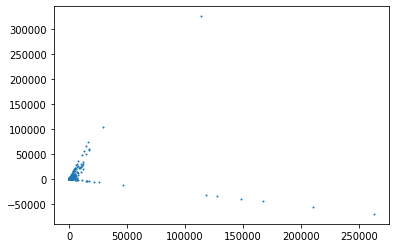

In [97]:
plt.scatter(pca[:,0], pca[:,1], cmap="viridis_r", s=1)

In [108]:
plt.scatter(pca[:,0], pca[:,1], cmap="viridis_r", c=df_T.index ,s=1)
plt.colorbar()

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not Index(['DRR068893', 'DRR068894', 'DRR068895', 'DRR095105', 'DRR095106',
       'DRR095107', 'DRR095108', 'DRR095109', 'DRR095110', 'DRR095111',
       'DRR095112', 'DRR095113', 'DRR095114', 'DRR095115', 'DRR095116'],
      dtype='object').

In [ ]:
b